In [1]:
 %config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


***
기울기와 y절편을 계산할 데이터를 만든다.
***

In [2]:
xData = [2, 4, 6, 8] # 공부시간
yData = [81, 93, 91, 97] # 공부시간에 따른 시험점수 -> 실제값

***
공부시간과 공부시간에 따른 데이터를 데이터프레임으로 만든다.
***

In [3]:
import numpy as np                                                          
import pandas as pd                                                       
import matplotlib.pyplot as plt     
import matplotlib as mpl  
mpl.rcParams['axes.unicode_minus'] = False                                  
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\JetBrainsMono-Regular.ttf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'NanumGothicCoding')
plt.rc('font', size = 16)
import seaborn as sns                                                       
import missingno as msno                           

In [4]:
df = pd.DataFrame(columns=['x', 'y']) # 빈 데이터프레임을 만든다.
# 빈 데이터프레임에 데이터를 넣을 때는 loc[index]를 사용해서 리스트 형태의 데이터를 넣어주면 된다.
df.loc[0] = [2, 81]
df.loc[1] = [4, 93]
df.loc[2] = [6, 91]
df.loc[3] = [8, 97]
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


***
공부시간과 공부시간에 따른 시험점수 시각화
***

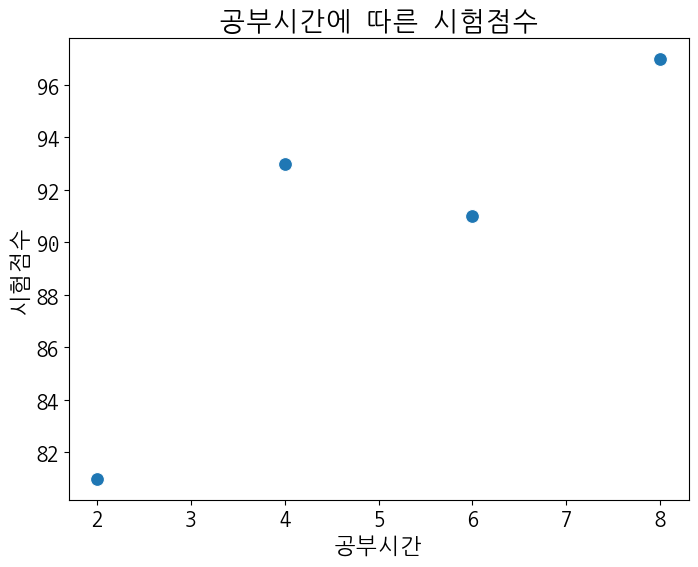

In [5]:
plt.figure(figsize=[8, 6])
sns.scatterplot(df, x = 'x', y = 'y', s = 100)
plt.title('공부시간에 따른 시험점수')
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.show()

***
기울기 공식
***
$\frac{\sum_{i = 0}^{n - 1}(x_i - \bar x)(y_i - \bar y)}{\sum_{i = 0}^{n - 1}(x_i - \bar x)^2}$

In [6]:
#공부시간과 공부시간에 따른 시험점수의 평균을 계산한다.
mean_x = np.mean(xData) # 공부시간의 평균
mean_y = np.mean(yData)
print('공부시간의 평균 -> {}시간, 공부시간에 따른 시험점수의 평균 -> {}점'.format(mean_x, mean_y))

공부시간의 평균 -> 5.0시간, 공부시간에 따른 시험점수의 평균 -> 90.5점


In [30]:
# 기울기 공식에서 분자를 계산하는 함수
def top(xData, mean_x, yData, mean_y):
    total = 0
    '''
    for i in range(len(xData)):
        sess = tf.Session()
        x = tf.placeholder(dtype=tf.float64)
        y = tf.placeholder(dtype=tf.float64)
        A = x[i] - mean_x
        B = y[i] - mean_y
        Z = A * B
        sess.run(tf.global_variables_initializer())
        result_1 = sess.run(Z, feed_dict={ x : xData, y : yData})
        total += result_1
    '''
    for i in range(len(xData)):
        total += (xData[i] - mean_x) * (yData[i] - mean_y)
    # ----- for i
    return total

numerator  = top(xData, mean_x, yData, mean_y)
print(numerator )

46.0


In [34]:
# 기울기 공식에서 분모를 계산하는 함수
def bottom(xData, mean_x):
    total = 0
    '''
    for j in range(len(xData)):
        sess = tf.Session()
        x = tf.placeholder(dtype=tf.float64)
        A = x[j] - mean_x
        B = tf.square(A)
        result_2 = sess.run(B, feed_dict={x : xData})
        total += result_2
    '''
    for j in range(len(xData)):
        #total += (xData[j] - mean_x) * (xData[j] - mean_x)
        total += (xData[j] - mean_x) ** 2
    #------- for j
    
    return total
denominator = bottom(xData, mean_x)
print(denominator)

20.0


In [35]:
print('기울기 공식의 분자 -> {}, 기울기 공식의 분모 -> {}'.format(numerator, denominator))
a = numerator / denominator
print('기울기 -> {}'.format (a))

기울기 공식의 분자 -> 46.0, 기울기 공식의 분모 -> 20.0
기울기 -> 2.3


***
y절편 공식
***


In [36]:
b = mean_y - (a * mean_x)
print('y절편 -> {}'.format(b))

y절편 -> 79.0
